In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32  #every element is a batch of 32 elements so the len of the dataset is 68


2176

In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)                          # 3 CHNNELS  i,e RGB channels.
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 1 0 0 0 1 1 1 1 2 1 1 0 2 1 2 0 2 0 1 1 1 0 0 0 0 1 1 1]


In [8]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0])   # FIRST ELEMENT  and it os a tensor 

tf.Tensor(
[[[146. 141. 148.]
  [121. 116. 123.]
  [130. 125. 132.]
  ...
  [183. 180. 187.]
  [177. 174. 181.]
  [173. 170. 177.]]

 [[149. 144. 151.]
  [129. 124. 131.]
  [157. 152. 159.]
  ...
  [181. 178. 185.]
  [177. 174. 181.]
  [176. 173. 180.]]

 [[174. 169. 176.]
  [138. 133. 140.]
  [159. 154. 161.]
  ...
  [180. 177. 184.]
  [180. 177. 184.]
  [181. 178. 185.]]

 ...

 [[145. 137. 148.]
  [137. 129. 140.]
  [135. 127. 138.]
  ...
  [168. 165. 176.]
  [163. 160. 171.]
  [167. 164. 175.]]

 [[153. 145. 156.]
  [150. 142. 153.]
  [141. 133. 144.]
  ...
  [166. 163. 174.]
  [162. 159. 170.]
  [168. 165. 176.]]

 [[133. 125. 136.]
  [134. 126. 137.]
  [121. 113. 124.]
  ...
  [158. 155. 166.]
  [152. 149. 160.]
  [157. 154. 165.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy())      # because that is a tensor we have to convert to numpy
                                       # the color is represented from 0 to 255

[[[194. 184. 183.]
  [190. 180. 179.]
  [191. 181. 180.]
  ...
  [173. 163. 171.]
  [173. 163. 171.]
  [173. 163. 171.]]

 [[194. 184. 183.]
  [193. 183. 182.]
  [195. 185. 184.]
  ...
  [170. 160. 168.]
  [172. 162. 170.]
  [173. 163. 171.]]

 [[190. 180. 179.]
  [190. 180. 179.]
  [194. 184. 183.]
  ...
  [169. 159. 167.]
  [172. 162. 170.]
  [174. 164. 172.]]

 ...

 [[147. 129. 129.]
  [150. 132. 132.]
  [148. 130. 130.]
  ...
  [137. 125. 129.]
  [127. 115. 119.]
  [131. 119. 123.]]

 [[132. 114. 114.]
  [141. 123. 123.]
  [146. 128. 128.]
  ...
  [125. 113. 117.]
  [121. 109. 113.]
  [124. 112. 116.]]

 [[135. 117. 117.]
  [143. 125. 125.]
  [146. 128. 128.]
  ...
  [124. 112. 116.]
  [127. 115. 119.]
  [132. 120. 124.]]]


In [10]:
for image_batch , label_batch in dataset.take(1):
    
    print(image_batch[0].shape)

(256, 256, 3)


(256, 256, 3)


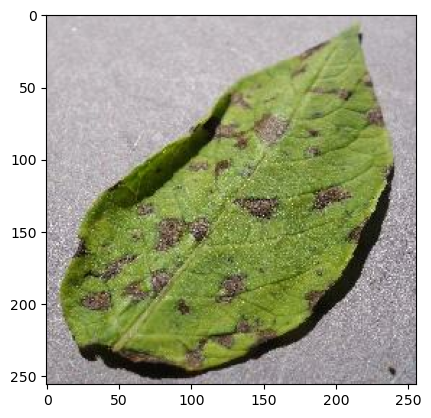

In [11]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch[0].shape)

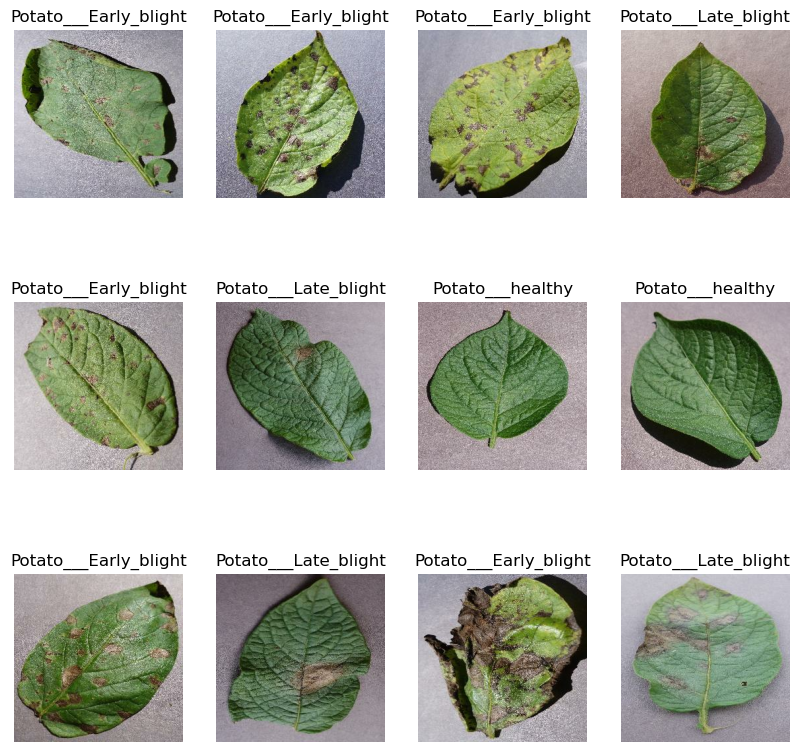

In [12]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [13]:
len(dataset)

68

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [17]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)


Epoch 1/5
54/54 [==============================] - 222s 4s/step - loss: 0.9208 - accuracy: 0.4786 - val_loss: 0.8754 - val_accuracy: 0.7188
Epoch 2/5
54/54 [==============================] - 217s 4s/step - loss: 0.7584 - accuracy: 0.6834 - val_loss: 0.6266 - val_accuracy: 0.7760
Epoch 3/5
54/54 [==============================] - 226s 4s/step - loss: 0.4659 - accuracy: 0.8189 - val_loss: 0.5263 - val_accuracy: 0.7865
Epoch 4/5
54/54 [==============================] - 231s 4s/step - loss: 0.4256 - accuracy: 0.8426 - val_loss: 0.2597 - val_accuracy: 0.8958
Epoch 5/5
54/54 [==============================] - 229s 4s/step - loss: 0.3320 - accuracy: 0.8686 - val_loss: 0.3526 - val_accuracy: 0.8490


In [33]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 973ms/step - loss: 0.5274 - accuracy: 0.8086


In [34]:
scores

[0.5274033546447754, 0.80859375]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
type(history.history['loss'])

list

In [39]:
len(history.history['loss'])

5

In [40]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9208459258079529,
 0.7583565711975098,
 0.46589234471321106,
 0.4255950450897217,
 0.3319747745990753]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (50,) and (5,)

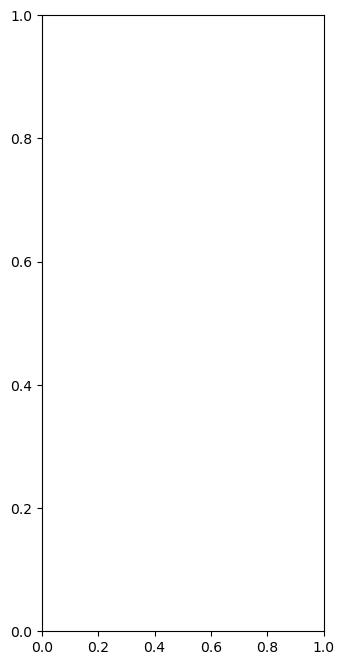

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 504ms/step
predicted label: Potato___Early_blight


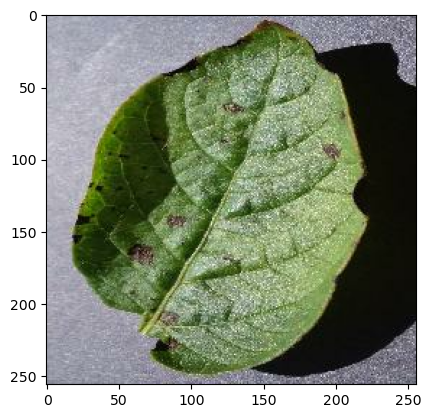

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 66ms/step


In [58]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [59]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [61]:
model.save("../potatoes.h5")